In [1]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the forest fire dataset from UCI Machine Learning Repository
forest_data = pd.read_csv('forestfires.csv')

## 1. Summary Statistics

In [3]:
# Summary statistics of each variable
forest_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [30]:
# Number of missing values for each variable
forest_data.isnull().sum(axis = 0)

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

**Observation**: 

If we look closely to the target variable, `area`, we can notice that the maximum value is way larger than the 75-percentile. It may indicate possible extreme value/outlier.

Largest top 10 values for the `area` variable: `[105.66, 154.88, 174.63, 185.76, 196.48, 200.94, 212.88, 278.53, 746.28, 1090.84]`

After a closer look, we do see two records with extremely large values compared to others, `746.28` and `1090.84`. Hence, we exclude those two records in the following explorative data analysis. These records should be treated separately in any future potential modeling process.

In [55]:
forest_data_sub = forest_data.loc[forest_data.area < 300,:]

## 2. Correlation Heat Map

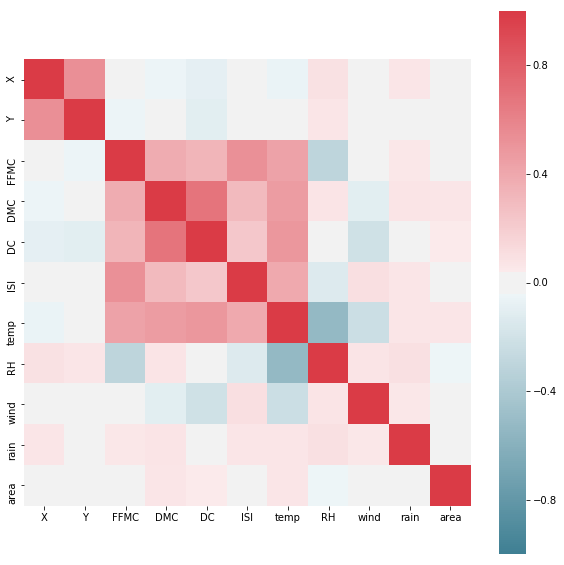

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax = sns.heatmap(forest_data_sub.corr(), vmin = -1, vmax = 1, square = True, cmap = sns.diverging_palette(220, 10, as_cmap=True))

**Observation**:

1. All index values from the FWI (Fire Weather Index) system have strong correlation with each other, which makes sense since all of them are trying to measure the same object.
2. `temp` and `RH (relative humidity)` has a negative correlation which is also align with our commen sense.
3. Our main target, `area`, does not seem to have any directly clear correlation with any other variables in this dataset.

## 3. Pairwise plots

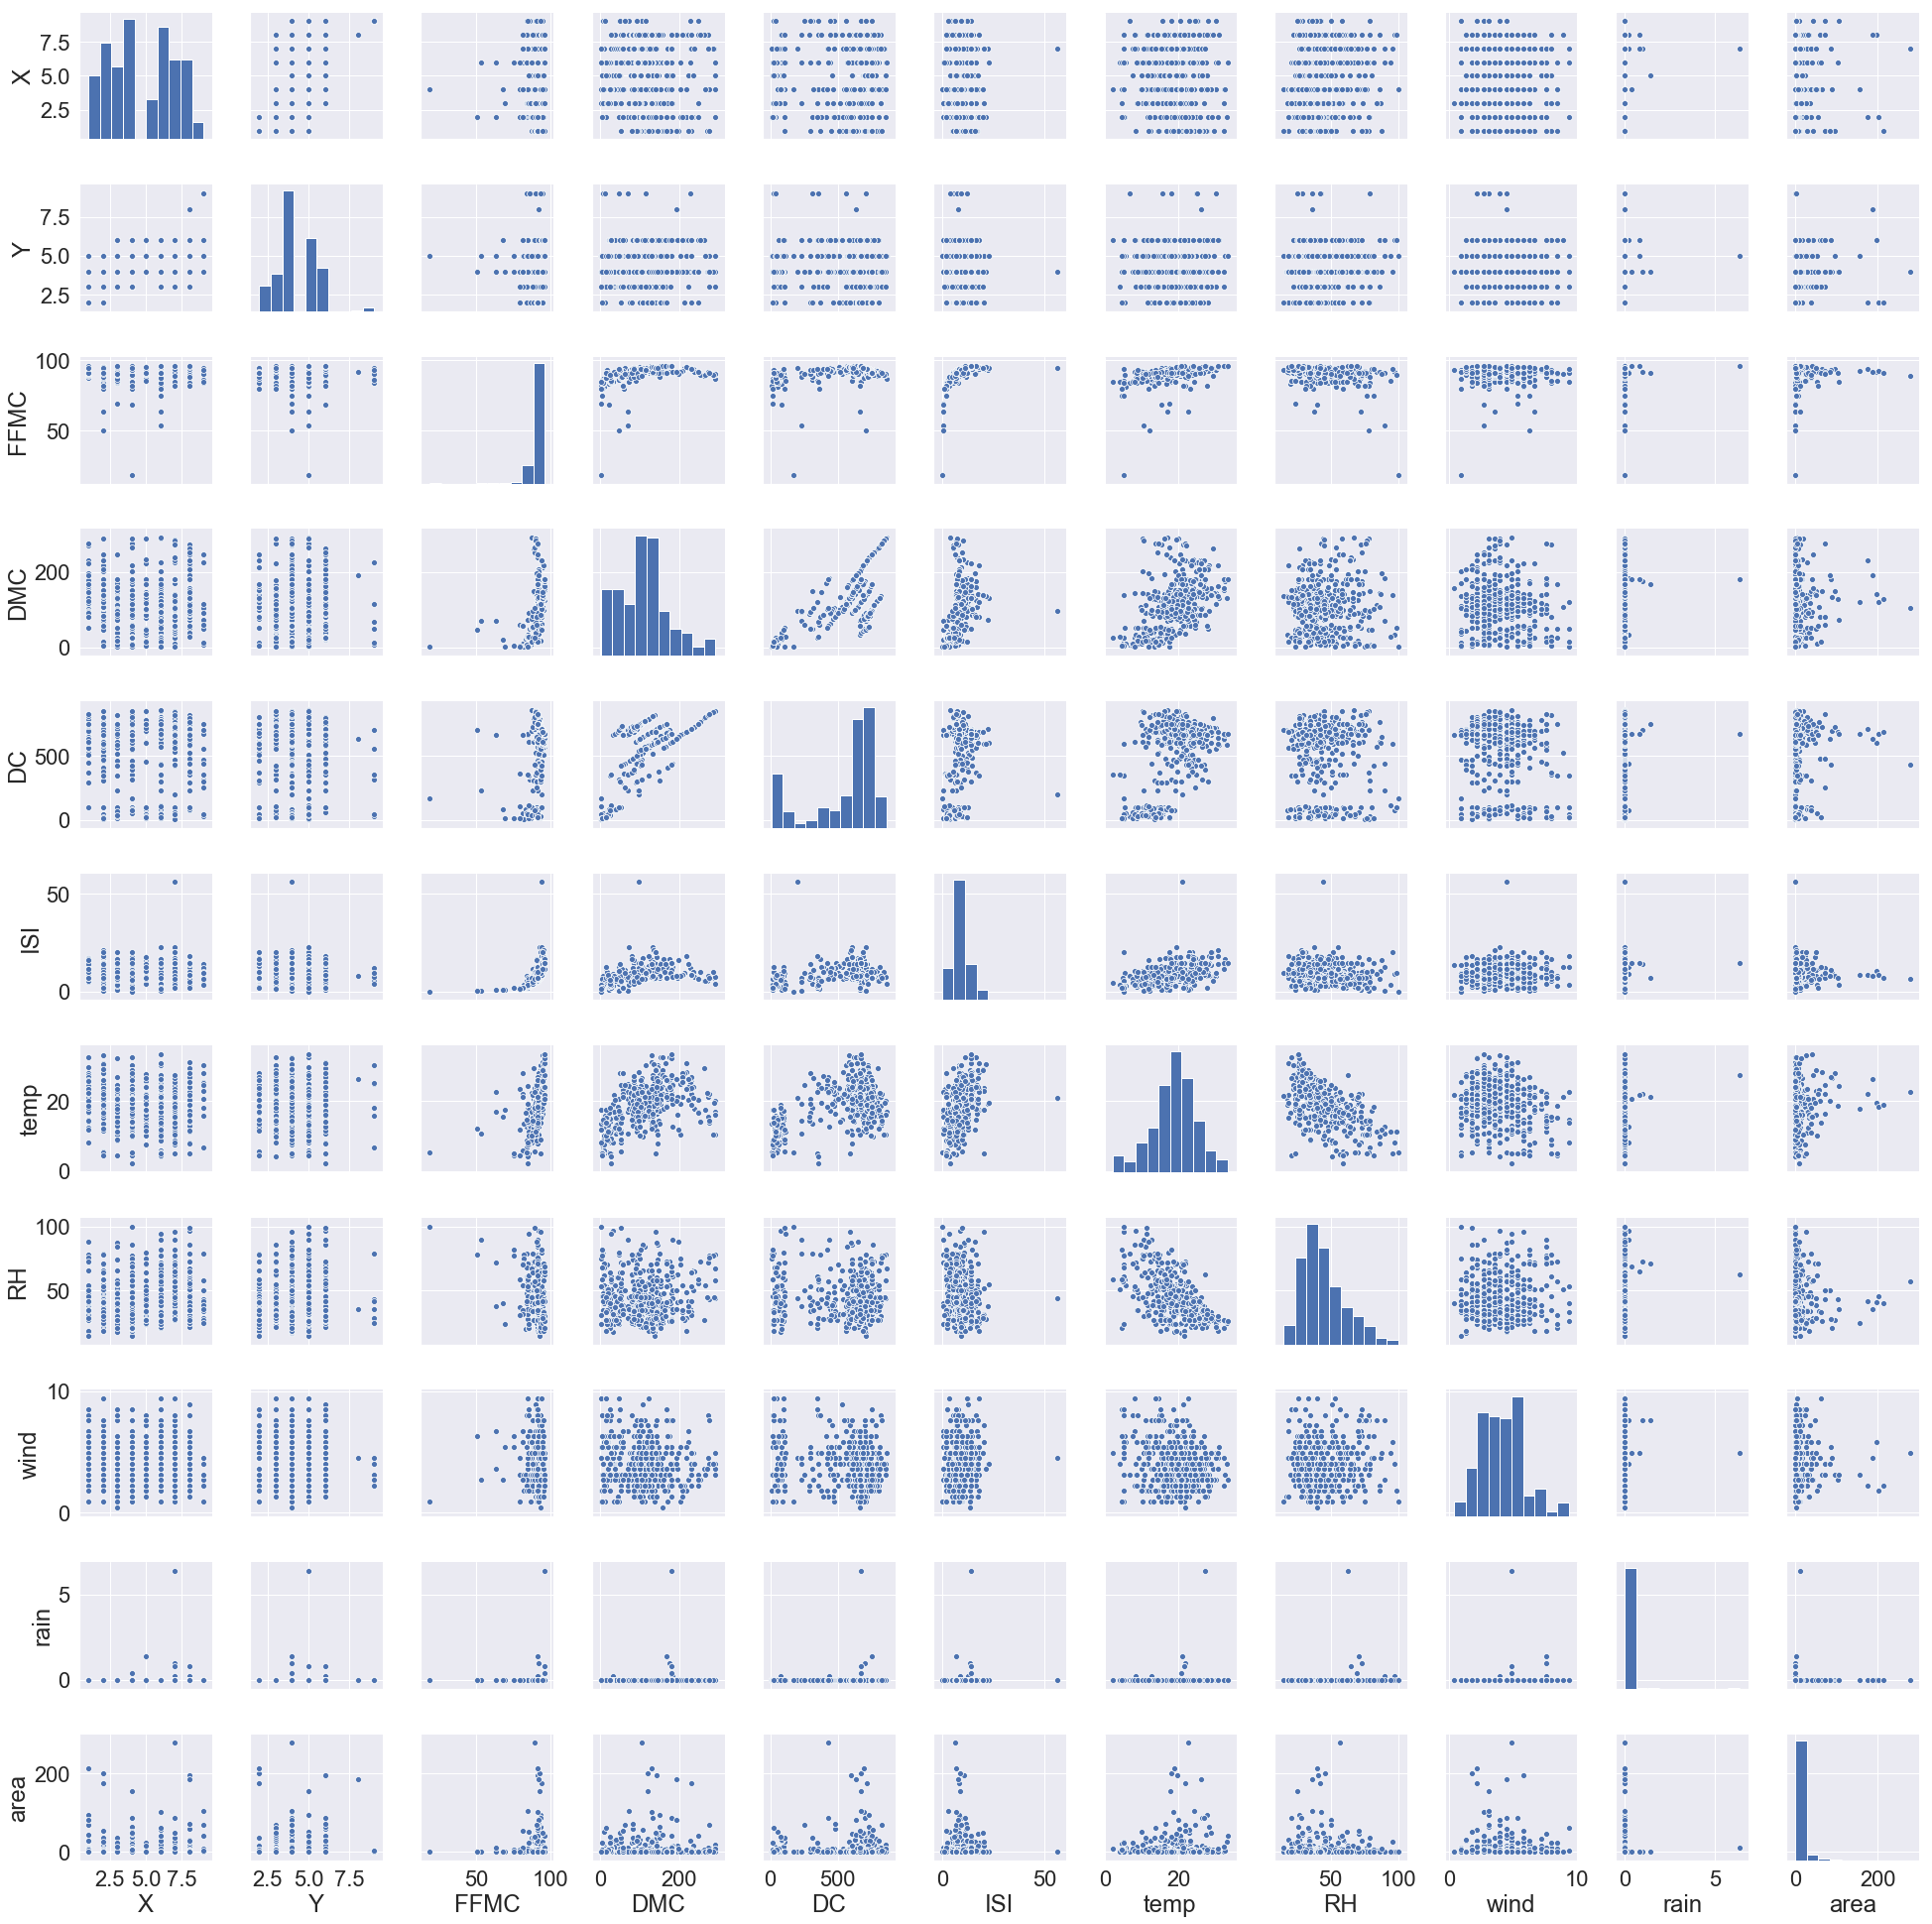

In [84]:
sns.set(font_scale=2)
ax = sns.pairplot(forest_data_sub)

In [79]:
# Number of unique coordinates
len(np.unique([[x,y] for x,y in zip(forest_data_sub.X,forest_data_sub.Y)], axis = 0))

36

In [82]:
# Number of the events with zero burned area
print('{} records ({:.2f}%) have zero burned area'.format(sum(forest_data_sub.area == 0), 
                                                      100 * sum(forest_data_sub.area == 0)/forest_data_sub.shape[0]))

247 records (47.96%) have zero burned area


**Observation**:
    
1. Although we have `517` different forest fire events recorded, they only happen in `36` different locations
2. Most of the events happen with zero or very little raining
3. Nearly half (`47.96%`) of the events have zero burned area, which should be considered when try to model the target variable